In [1]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import json
import pickle
from keras.preprocessing import sequence, image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from notebook_utils import initialize_environment
from keras.preprocessing.image import array_to_img, save_img, img_to_array
from keras.models import model_from_json
initialize_environment()
from ast import literal_eval

from utils.data_loading.load_data import get_tile_data

In [2]:
##loading train and testing data

data_directory = "../data/context_data/"
json_directory = "../data/json_files_trimmed_features/"
data = get_tile_data(data_directory, json_directory)
print("\nThe size of total data is", data.shape)
data = shuffle(data)

# split into train-test
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.10, random_state=42)

print("\nThe size of the train data is ", train_data.shape)
print("The size of the test data is ", test_data.shape)

Games detected in the parent folder ['lode_runner', 'kid_icarus', 'megaman', 'smb', 'loz']
Current Game lode_runner
Reading mappings
Json File Loaded
Reading Sprite Data From ../data/context_data/lode_runner
Current Game kid_icarus
Reading mappings
Json File Loaded
Reading Sprite Data From ../data/context_data/kid_icarus
Current Game megaman
Reading mappings
Json File Loaded
Reading Sprite Data From ../data/context_data/megaman
Current Game smb
Reading mappings
Json File Loaded
Reading Sprite Data From ../data/context_data/smb
Current Game loz
Reading mappings
Json File Loaded
Reading Sprite Data From ../data/context_data/loz

The size of total data is (25394, 5)

The size of the train data is  (22854, 5)
The size of the test data is  (2540, 5)


In [3]:
# Feature Dictionary
print("Building feature Dictionary..")
mlb = MultiLabelBinarizer()
combined_features = np.concatenate(
    [train_data["features"], test_data["features"]], axis=0
)

mlb_model = mlb.fit(combined_features)
total_features = len(mlb_model.classes_)
print("The feature dictionary has size", total_features)
print("Printing Feature classes")
display(mlb_model.classes_)

Building feature Dictionary..
The feature dictionary has size 13
Printing Feature classes


array(['block', 'breakable', 'climbable', 'collectable', 'element',
       'empty', 'hazard', 'moving', 'openable', 'passable', 'pipe',
       'solid', 'wall'], dtype=object)

In [4]:
# load the multilabel binarizer
with open("../model/model_tokenizer.pickle", "rb") as handle:
    mlb = pickle.load(handle)
print("Feature Dictionary Loaded")
total_features = len(mlb.classes_)
print("The feature dictionary has size", total_features)
display("Features", mlb.classes_)

# load entire autoencoder architecture
json_file = open("../model/autoencoder_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
ae_sep_output = model_from_json(loaded_model_json)
ae_sep_output.load_weights("../model/autoencoder_model.h5")
print("Loaded Entire Autoencoder Model from the Disk")

# load the encoding architecture and weights
json_file = open("../model/encoder_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
encoding_model = model_from_json(loaded_model_json)
encoding_model.load_weights("../model/encoder_model.h5")
print("Loaded Encoder Model from the Disk")

# load the decoding architecture and weights
json_file = open("../model/decoder_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
decoding_model = model_from_json(loaded_model_json)
# load weights into new model
decoding_model.load_weights("../model/decoder_model.h5")
print("Loaded Decoder Model from the Disk")

Feature Dictionary Loaded
The feature dictionary has size 13


'Features'

array(['block', 'breakable', 'climbable', 'collectable', 'element',
       'empty', 'hazard', 'moving', 'openable', 'passable', 'pipe',
       'solid', 'wall'], dtype=object)

Loaded Entire Autoencoder Model from the Disk
Loaded Encoder Model from the Disk
Loaded Decoder Model from the Disk


In [61]:
# # Build Input Output Training Batches
# print("Building Training Batches")

# """Note : Add Generators"""
# train_image_batch = []
# for train_path in train_data["image_path"]:
#     tile = image.load_img(train_path, target_size=(48, 48))
#     tile_sprite = image.img_to_array(tile)
#     train_image_batch.append(tile_sprite)
# train_image_batch = np.array(train_image_batch)
# train_text_batch = []
# for i in range(len(train_data["features"])):
#     text_ = mlb.transform(train_data["features"][i : i + 1])
#     train_text_batch.append(text_)
# train_text_batch = np.array(train_text_batch).reshape(
#     train_data.shape[0], total_features
# )

# output_image_batch = []
# for i in range(len(train_image_batch)):
#     current_image = train_image_batch[i]
#     current_image_centre = train_image_batch[i][16 : 16 + 16, 16 : 16 + 16, :]
#     output_image_batch.append(current_image_centre)
# output_image_batch = np.array(output_image_batch)
# output_text_batch = []
# for i in range(len(train_text_batch)):
#     current_text = train_text_batch[i]
#     output_text_batch.append(current_text)
# output_text_batch = np.array(output_text_batch)
# print("Training Data Ready")
# print("Train Image batch shape", train_image_batch.shape)
# print("Train Text batch shape", train_text_batch.shape)
# print("Output Image batch shape", output_image_batch.shape)
# print("Output Text batch shape", output_text_batch.shape)


# # Build Input Output Test Batches
# print("Building Testing Batches")
# """Note : Add Generators"""
# test_image_batch = []
# for test_path in test_data["image_path"]:
#     tile = image.load_img(test_path, target_size=(48, 48))
#     tile_sprite = image.img_to_array(tile)
#     test_image_batch.append(tile_sprite)
# test_image_batch = np.array(test_image_batch)
# test_text_batch = []
# for i in range(len(test_data["features"])):
#     text_ = mlb.transform(test_data["features"][i : i + 1])
#     test_text_batch.append(text_)
# test_text_batch = np.array(test_text_batch).reshape(test_data.shape[0], total_features)
# print("\n\nTesting Data Ready")
# print("Train Image batch shape", test_image_batch.shape)
# print("Train Text batch shape", test_text_batch.shape)

In [219]:
data_1=data[data["game_identifier"]=="smb"]
display(np.array(np.where(data_1['centre_tile']=='S'))[0][:25])


data_2=data[data["game_identifier"]=="megaman"]
display(np.array(np.where(data_2['centre_tile']=='l'))[0][:15])

array([ 15,  18,  41,  44,  49,  55,  58,  83,  92, 109, 146, 147, 148,
       159, 161, 164, 166, 177, 189, 191, 192, 202, 221, 223, 233])

array([  36,   74,  277,  286,  367,  412,  423,  494,  857, 1031, 1412,
       1658, 1765, 1770, 2110])

In [228]:
i=109
j=1532
k=399
m=423

print(data_1['centre_tile'].iloc[i])
print(data_2['centre_tile'].iloc[j])
print(data_2['centre_tile'].iloc[k])
print(data_2['centre_tile'].iloc[m])

S
D
H
l


In [229]:

tile_i = image.load_img(data_1['image_path'].iloc[i], target_size=(48, 48))
tile_sprite_i = image.img_to_array(tile_i)
i_centre=tile_sprite_i[16:32,16:32,:]
tile_sprite_i=tile_sprite_i.reshape(1,48,48,3)
Test1=array_to_img(i_centre)
display(Test1)
text_i = mlb.transform(data_1["features"].iloc[i : i + 1])
display(mlb.inverse_transform(text_i))

tile_j = image.load_img(data_2['image_path'].iloc[j], target_size=(48, 48))
tile_sprite_j = image.img_to_array(tile_j)
j_centre=tile_sprite_j[16:32,16:32,:]
tile_sprite_j=tile_sprite_j.reshape(1,48,48,3)
Test2=array_to_img(j_centre)
display(Test2)
text_j = mlb.transform(data_2["features"].iloc[j : j + 1])
display(mlb.inverse_transform(text_j))

tile_k = image.load_img(data_2['image_path'].iloc[k], target_size=(48, 48))
tile_sprite_k = image.img_to_array(tile_k)
k_centre=tile_sprite_k[16:32,16:32,:]
tile_sprite_k=tile_sprite_k.reshape(1,48,48,3)
Test2=array_to_img(k_centre)
display(Test2)
text_k = mlb.transform(data_2["features"].iloc[k : k + 1])
display(mlb.inverse_transform(text_k))

tile_m = image.load_img(data_2['image_path'].iloc[m], target_size=(48, 48))
tile_sprite_m = image.img_to_array(tile_m)
m_centre=tile_sprite_m[16:32,16:32,:]
tile_sprite_m=tile_sprite_m.reshape(1,48,48,3)
Test2=array_to_img(m_centre)
display(Test2)
text_m = mlb.transform(data_2["features"].iloc[m : m + 1])
display(mlb.inverse_transform(text_m))

encoding_i=encoding_model.predict([tile_sprite_i,text_i])
encoding_j=encoding_model.predict([tile_sprite_j,text_j])
encoding_k=encoding_model.predict([tile_sprite_k,text_k])
encoding_m=encoding_model.predict([tile_sprite_m,text_m])


encoding_ij=(encoding_i-encoding_j)*0.50+encoding_j
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

encoding_ik=(encoding_i-encoding_k)*0.50+encoding_k
decoding_img,decoding_text = decoding_model.predict(encoding_ik)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

encoding_im=(encoding_i-encoding_m)*0.50+encoding_m
decoding_img,decoding_text = decoding_model.predict(encoding_im)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

[('breakable', 'solid')]

[('moving', 'solid')]

[('hazard', 'solid')]

[('collectable', 'passable')]

[('breakable', 'solid')]

[('solid',)]

[('solid',)]

In [183]:
tile_i = image.load_img(data_1['image_path'].iloc[i], target_size=(48, 48))
tile_sprite_i = image.img_to_array(tile_i)
i_centre=tile_sprite_i[16:32,16:32,:]
tile_sprite_i=tile_sprite_i.reshape(1,48,48,3)
Test1=array_to_img(i_centre)
display(Test1)
text_i = mlb.transform(data_1["features"].iloc[i : i + 1])
display(mlb.inverse_transform(text_i))

tile_j = image.load_img(data_2['image_path'].iloc[j], target_size=(48, 48))
tile_sprite_j = image.img_to_array(tile_j)
j_centre=tile_sprite_j[16:32,16:32,:]
tile_sprite_j=tile_sprite_j.reshape(1,48,48,3)
Test2=array_to_img(j_centre)
display(Test2)
text_j = mlb.transform(data_2["features"].iloc[j : j + 1])
display(mlb.inverse_transform(text_j))

encoding_i=encoding_model.predict([tile_sprite_i,text_i])
encoding_j=encoding_model.predict([tile_sprite_j,text_j])

print("\PRINTING")

encoding_ij=(encoding_i-encoding_j)*0.25+encoding_j
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

encoding_ij=(encoding_i-encoding_j)*0.50+encoding_j
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

encoding_ij=(encoding_i-encoding_j)*0.75+encoding_j
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
Test3=array_to_img(decoding_img.reshape(16,16,3))
display(Test3)
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
display(mlb.inverse_transform(decoding_text))

# print("\nREVERSING")

# encoding_ij=(encoding_j-encoding_i)*0.25+encoding_i
# decoding_img,decoding_text = decoding_model.predict(encoding_ij)
# Test3=array_to_img(decoding_img.reshape(16,16,3))
# display(Test3)
# decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
# decoding_text=np.array(decoding_text)
# display(mlb.inverse_transform(decoding_text))

# encoding_ij=(encoding_j-encoding_i)*0.5+encoding_i
# decoding_img,decoding_text = decoding_model.predict(encoding_ij)
# Test3=array_to_img(decoding_img.reshape(16,16,3))
# display(Test3)
# decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
# decoding_text=np.array(decoding_text)
# display(mlb.inverse_transform(decoding_text))

# encoding_ij=(encoding_j-encoding_i)*0.75+encoding_i
# decoding_img,decoding_text = decoding_model.predict(encoding_ij)
# Test3=array_to_img(decoding_img.reshape(16,16,3))
# display(Test3)
# decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
# decoding_text=np.array(decoding_text)
# display(mlb.inverse_transform(decoding_text))


# encoding_ij=(0.70*encoding_i)-(0.30*encoding_j)
# decoding_img,decoding_text = decoding_model.predict(encoding_ij)
# Test3=array_to_img(decoding_img.reshape(16,16,3))
# display(Test3)
# decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
# decoding_text=np.array(decoding_text)
# display(mlb.inverse_transform(decoding_text))

[('hazard', 'moving')]

[('breakable', 'solid')]

\PRINTING


[('breakable', 'solid')]

[('hazard', 'solid')]

[('hazard', 'moving')]

In [217]:
import sys
from PIL import Image

images = [Test1, Test2, Test3]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width+20, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset +=10
    x_offset += im.size[0]

new_im

In [211]:
i=0
j=10

tile_i = image.load_img(smb_data['image_path'].iloc[i], target_size=(48, 48))
tile_sprite_i = image.img_to_array(tile_i)
i_centre=tile_sprite_i[16:32,16:32,:]
tile_sprite_i=tile_sprite_i.reshape(1,48,48,3)
Test1=array_to_img(i_centre)
text_i = mlb.transform(train_data["features"].iloc[i : i + 1])

tile_j = image.load_img(smb_data['image_path'].iloc[j], target_size=(48, 48))
tile_sprite_j = image.img_to_array(tile_j)
j_centre=tile_sprite_j[16:32,16:32,:]
tile_sprite_j=tile_sprite_j.reshape(1,48,48,3)
Test2=array_to_img(j_centre)
text_j = mlb.transform(train_data["features"].iloc[j : j + 1])

encoding_i=encoding_model.predict([tile_sprite_i,text_i])
encoding_j=encoding_model.predict([tile_sprite_j,text_j])
encoding_ij=(encoding_i)-(encoding_j)

decoding_img,decoding_text = decoding_model.predict(encoding_ij)
Test3=array_to_img(decoding_img.reshape(16,16,3))
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
mlb.inverse_transform(decoding_text)

[('block',
  'breakable',
  'climbable',
  'collectable',
  'element',
  'empty',
  'hazard',
  'moving',
  'passable')]

In [39]:
import sys
from PIL import Image

images = [Test1, Test2, Test3]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width+20, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset +=10
    x_offset += im.size[0]

new_im.save('test.jpg')
new_im

In [96]:
i=90
j=13

centre_tile=str(train_data['centre_tile'].iloc[i])+str(train_data['centre_tile'].iloc[j])
centre_tile

'EF'

In [97]:
tile_i = image.load_img(train_data['image_path'].iloc[i], target_size=(48, 48))
tile_sprite_i = image.img_to_array(tile_i)
tile_sprite_i = tile_sprite_i.reshape(1,48,48,3)
text_i = mlb.transform(train_data["features"].iloc[i : i + 1])

tile_j = image.load_img(train_data['image_path'].iloc[j], target_size=(48, 48))
tile_sprite_j = image.img_to_array(tile_j)
tile_sprite_j = tile_sprite_j.reshape(1,48,48,3)
text_j = mlb.transform(train_data["features"].iloc[j : j + 1])

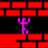

[[0 0 0 0 0 0 1 0 0 0 0 1 0]]
[('hazard', 'solid')]


In [98]:
display(tile_i)
print(text_i)
print(mlb.inverse_transform(text_i))

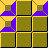

[[0 0 0 0 0 0 0 0 0 0 0 1 0]]
[('solid',)]


In [99]:
display(tile_j)
print(text_j)
print(mlb.inverse_transform(text_j))

In [100]:
text_i.shape

(1, 13)

In [109]:
encoding_i=encoding_model.predict([tile_sprite_i,text_i])
encoding_j=encoding_model.predict([tile_sprite_j,text_j])

encoding_ij=(encoding_i+encoding_j)
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
display(array_to_img(decoding_img.reshape(16,16,3)))
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
mlb.inverse_transform(decoding_text)

[('hazard', 'solid')]

In [110]:
encoding_i=encoding_model.predict([tile_sprite_i,text_i])
encoding_j=encoding_model.predict([tile_sprite_j,text_j])

encoding_ij=(encoding_i-encoding_j)
decoding_img,decoding_text = decoding_model.predict(encoding_ij)
display(array_to_img(decoding_img.reshape(16,16,3)))
decoding_text = [np.where(text > 0.5, 1, 0) for text in decoding_text]
decoding_text=np.array(decoding_text)
mlb.inverse_transform(decoding_text)

[('climbable', 'hazard', 'moving', 'solid')]

In [90]:
# decoding_img,decoding_text=ae_sep_output.predict([tile_sprite_i,text_i])

[('block', 'breakable', 'openable', 'solid')]